# Weather Derivatives - Introduction to Temperature Options

<b> YouTube Tutorial </b> (Published: Jul 1, 2022): https://youtu.be/5AuoAA5uZkY

It is estimated that nearly 30 percent of the US economy is directly affected by the weather [1,3].

Weather derivatives are financial instruments that can be used to reduce risk associated with adverse weather conditions:
- temperature
- rain
- snow
- frost

The first weather derivative was traded Over-the-counter (OTC) in July 1996 when Aquila Energy structured a dual-commodity hedge for Consolidated Edison Co.
They have continued to trade OTC since 1997 and as the market grew, the Chicago Mercangile Exchange (CME) introducted exchange traded weather futures and options from 22-Sep 1999.

<img src=https://www.cmegroup.com/education/images/2021/managing-climate-risk-with-cme-group-weather-futures-and-options-fig03.jpg width=500>

<b>References</b>:

[1] Weather Futures and Options (CME Group Inc, 2021)  https://www.cmegroup.com/trading/weather/files/weather-fact-card.pdf

[2] Managing Climate Risk with CME Group Weather Futures and Options (Dominic Sutton-Vermeule, 20-Jan 2021) https://www.cmegroup.com/education/articles-and-reports/managing-climate-risk-with-cme-group-weather-futures-and-options.html

[3] MANAGING CLIMATE RISK IN THE U.S. FINANCIAL SYSTEM, ISBN: 978-0-578-74841-2 (2020) https://www.cftc.gov/sites/default/files/2020-09/9-9-20%20Report%20of%20the%20Subcommittee%20on%20Climate-Related%20Market%20Risk%20-%20Managing%20Climate%20Risk%20in%20the%20U.S.%20Financial%20System%20for%20posting.pdf

## Terminology of Degree Days

Temperature data is readily available, free of charge for many meteorological stations across the world. The information is given in the form of a high and low every day.
- High - max temperature of the day: $\large T^{max}_n$
- Min  - min temperature of the day: $\large T^{min}_n$
- Avg  - avg temperature of the day: $\large T_n$

$\large T_n = \frac{T^{max}+T^{max}}{2}$

Although this definition is not exactly the intuitive notation of what average temperatures are for a given day, this is the standard definition that is used for definind heating degree days (HDD) and cooling degree days (CDD).

On each day (period) $n \in N$:
- the heating degree days is defined as $\large HDD_n = (65-T_n)^+$
- the cooling degree days is defined as $\large CDD_n = (T_n - 65)^+$

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Example

In [ ]:
temps = np.random.normal(65,5,92)
HDD_p = np.maximum(0, 65-temps)
CDD_p = np.maximum(0, temps-65)

df = pd.DataFrame(np.array([temps, HDD_p, CDD_p]).T, index=range(1,len(temps)+1), columns=['Avg Temp', 'HDD', 'CDD'])
df.loc['Total'] = pd.Series(df[['HDD', 'CDD']].sum())
round(df,2)

,Avg Temp,HDD,CDD
1,64.62,0.38,0.00
2,70.93,0.00,5.93
3,66.17,0.00,1.17
4,69.19,0.00,4.19
5,55.27,9.73,0.00
...,...,...,...
89,63.72,1.28,0.00
90,70.59,0.00,5.59
91,57.07,7.93,0.00
92,62.62,2.38,0.00


## Traded Products

Futures contracts on monthly cumulative degree days have been introduced by the [CME.](https://www.cmegroup.com/trading/weather/)

But [traded volumes are small](https://www.cmegroup.com/daily_bulletin/current/Section24_Weather_Futures_And_Options.pdf).

<img src=https://www.cmegroup.com/education/images/2021/managing-climate-risk-with-cme-group-weather-futures-and-options-fig01.jpg width=500>

So we will be considering contracts that trade in the OTC market. We standardise our notation to refer to other reference temperatures instead of only 65 degrees fahrenheit.

For a day $n \in N$:
- $\large HDD_n = (T_{ref}-T_n)^+$
- $\large CDD_n = (T_n - T_{ref})^+$

Here the buyer of an option with receive an amount:

$\large \xi = f(DD)$

payoff function $f$ is computed on the cumulative index over a period $P$:
   - heating degree seasons $DD = H_n = HDD^{N} = \sum^N_n HDD_n$
   - cooling degree seasons $DD = C_n = CDD^{N} = \sum^N_n CDD_n$

#### Typical Seasons OTC

- CDD season: 15-May to 15-Sep
- HDD season: 15-Dec(Nov) to 15-Mar


In [ ]:
alpha = 5000
beta = 5000
Kc = 750
Kp = 550
C = 5e5
F = 1e6

DD = np.arange(200,1000,10)
call = np.minimum(alpha*np.maximum(DD-Kc,0), C)
put = np.minimum(alpha*np.maximum(Kp-DD,0), F)
collar = call - put

## Popular Payoff Functions [4]

### Call with Cap

$\large \xi = min\{\alpha(DD - K)^+, C\}$

<b>where:</b>
 - payoff rates $\large \alpha$ is commonly US$\$2,500$ or US$\$5,000$ [4]
 - while caps $\large C$ is commonly US$\$500,000$ or US$\$1,000,000$ [4]

Example: cruises suffer with reduced summer sales when there are extremely hot spring weathe. to hedge risk the company buys an out of the money call on Spring CDD's, possibly with a cap because the business will sell a minimum number of cruises no matter what.

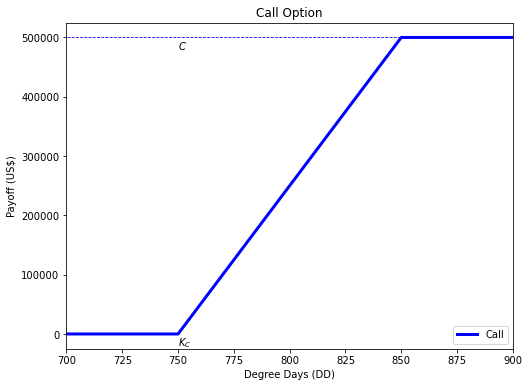

In [ ]:
fig = plt.figure(figsize=(8,6))
plt.plot(DD, call, 'b', linewidth=3, label='Call')
plt.plot([200,1000],[C,C], 'b--', linewidth=0.8)

plt.text(750, C-.2e5, r'$C$')
plt.text(Kc, -.2e5, r'$K_C$')
plt.xlim([700,900])

plt.title('Call Option')
plt.xlabel('Degree Days (DD)')
plt.ylabel("Payoff (US$)")
plt.legend()
plt.show()

### Put with Floor

$\large \xi = min\{\alpha(K - DD)^+, F\}$

Example: To hedge risk that a warm winter decreases sales revenue from a gas company, they may choose to buy a put on HDD's over the winter season.

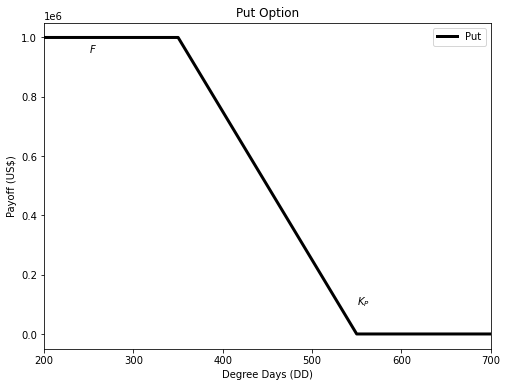

In [ ]:
fig = plt.figure(figsize=(8,6))
plt.plot(DD, put, 'k', linewidth=3, label='Put')

plt.text(250, F-5e4, r'$F$')
plt.text(Kp, +.1e6, r'$K_P$')
plt.xlim([200,700])

plt.title('Put Option')
plt.xlabel('Degree Days (DD)')
plt.ylabel("Payoff (US$)")
plt.legend()
plt.show()

### Collar

$\large \xi = min\{\alpha(DD - K_1)^+, C\} - min\{\beta(K_2 - DD)^+, F\}$

Example: to hedge revenues against a mild winter, a gas company could enter into a zero dollar collar contract (no up-front cost) that pays the writer if the winter is cold and receives payment if the winter is warm.

<b>References:</b>

[4] Statistical Analysis of Financial Data in R (Rene Carmona, 2014)

#### Plotting different temperature options

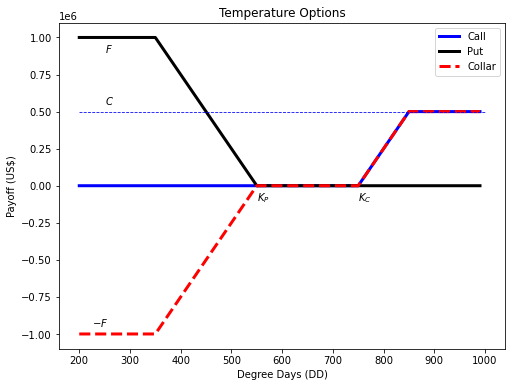

In [ ]:
fig = plt.figure(figsize=(8,6))
plt.plot(DD, call, 'b', linewidth=3, label='Call')
plt.plot(DD, put, 'k', linewidth=3, label='Put')
plt.plot(DD, collar, 'r--', linewidth=3, label='Collar')
plt.plot([200,1000],[C,C], 'b--', linewidth=0.8)

plt.text(250, C+.5e5, r'$C$')
plt.text(250, F-1e5, r'$F$')
plt.text(225, -F+.5e5, r'$-F$')

plt.text(Kc, -.1e6, r'$K_C$')
plt.text(Kp, -.1e6, r'$K_P$')

plt.title('Temperature Options')
plt.xlabel('Degree Days (DD)')
plt.ylabel("Payoff (US$)")
plt.legend()
plt.show()

## In the next videos

We will go through how to value temperature derivatives from top to bottom

### Modelling Daily Average Temperatures (DAT):

#### Modelling Seasonality

We need to de-trend and remove seasonality:
1. statsmodels decompose function [classical decomposition using moving averages](https://stackoverflow.com/questions/47076771/statsmodels-seasonal-decompose-what-is-naive-about-it)
2. De-trend and model seasonal component as fourier series

#### Modelling Temperature

For modelling temps we will look at using two different approaches

3. Time Series ARMA model
4. mean reverting Ornstein-Uhlenbeck process

#### Modelling Temperature Volatility

We will also need to model temperature volatility

5. Fourier series to model the volatility of temperature
6. Parametric Regression - Polynomial
7. Local and Nonparametric Regression - Splines
8. piece-wise non-constant functions with each piece capturing volatility for each season

### Pricing Temperature Options

We can use the statistical analysis of historical temperature data and models to price options.

We will quickly examine:

9. Actuarial approach like historical 'burn' analyis
10. Alternative Black Scholes approach with OU dynamics
11. Monte Carlo - with Time Series model
12. Monte Carlo - with OU model